In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from queue import Queue

from sklearn.datasets import make_circles, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# DBSCAN from scratch

In [20]:
class DBSCAN():
    """Class implements the unsupervised learning technique DBSCAN form scratch"""

    def __init__(self, epsilon, min_points):
        self.radius_eps = epsilon # Radius around core points known as "Epsilon"
        self.min_points = min_points # Minimum number within `radius_eps` to form a cluster

        # Constant labels used in fit() method
        self.UNCLUSTERED = -1
        self.CORE = 0
        self.BORDER = 1
        self.OUTLIER = 2
    
    def find_distance_matrix(self, data):
        """Function finds neighbouring points within radius epsilon"""

        self.distance_matrix = np.zeros(shape=(len(data), len(data)))
        for j, point in enumerate(data):
            self.distance_matrix[:, j] = np.linalg.norm(data - point, ord=2, axis=1)

    def cluster_points(self):
        """Function clusters neighbouring points"""

        cluster = 0
        # Perform a breadth first search to find directly and indirectly neighbouring points, for each cluster core
        for core_point in self.core_points:
            core_queue = Queue()
            if self.clustering[core_point] != self.UNCLUSTERED:
                continue

            self.clustering[core_point] = cluster
            neighbours_list = np.where(self.within_radius_mask[core_point, :])[0]

            # Iterate through all all directly reachable points and assign them to the cluster
            for neighbour in neighbours_list:
                if self.clustering[neighbour] != self.UNCLUSTERED:
                    continue
                # If neighbour is a core put it in queue
                elif self.points_labels[neighbour] == self.CORE:
                    core_queue.put(neighbour)
                    self.clustering[neighbour] = cluster
                else:
                    self.clustering[neighbour] = cluster

            # For every core point in queue, assign its neighbours to the cluster "indirectly reachable"
            while core_queue.empty() == False:
                neighbours_list = np.where(self.within_radius_mask[core_queue.get(), :])[0]
                for neighbour in neighbours_list:
                    if self.clustering[neighbour] != self.UNCLUSTERED:
                        continue
                    # If neighbour is a core put it in queue
                    elif self.points_labels[neighbour] == self.CORE:
                        core_queue.put(neighbour)
                        self.clustering[neighbour] = cluster
                    else:
                        self.clustering[neighbour] = cluster

            # Proceed to the next cluster    
            cluster += 1

    def label_points(self, data):
        """Function labels points as either CORE, BORDER or OUTLIER"""

        # Classify core and border points from outliers
        for point in range(len(data)):
            neighbours_count = np.sum(self.within_radius_mask[point, :]) 

            self.core_points = []
            self.border_points = []
            self.outliers = []

            if neighbours_count == 0:
                self.outliers.append(point)
            elif neighbours_count >= self.min_points:
                self.core_points.append(point)
                self.points_labels[point] = self.CORE
            else:
                self.border_points.append(point)
                self.points_labels[point] = self.BORDER
            
    def fit(self, data):
        """Fit DBSCAN algorithm to given data"""

        self.find_distance_matrix(data)

        self.within_radius_mask = (self.distance_matrix < self.radius_eps) # Boolean matrix

        # All points are initially outliers and unclustered
        self.points_labels = [self.OUTLIER] * len(data)
        self.clustering = [self.UNCLUSTERED] * len(data)
        
        self.label_points(data)
        self.cluster_points()

# Testing code
## First Dataset

Text(0, 0.5, 'Epsilon')

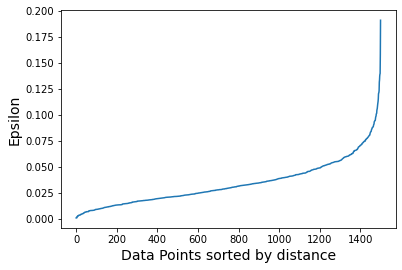

In [21]:
# Create a dataset
n_samples = 1500
data = make_circles(n_samples=n_samples, factor=.5, noise=.05, random_state=42)
data = StandardScaler().fit_transform(data[0])

# Decide on the value of epsilon
min_points = 4
nn = NearestNeighbors(n_neighbors=min_points)

nn.fit(data)

distances, neighbors = nn.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
X=list(range(0,len(distances)))
plt.plot(X, distances)

plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)

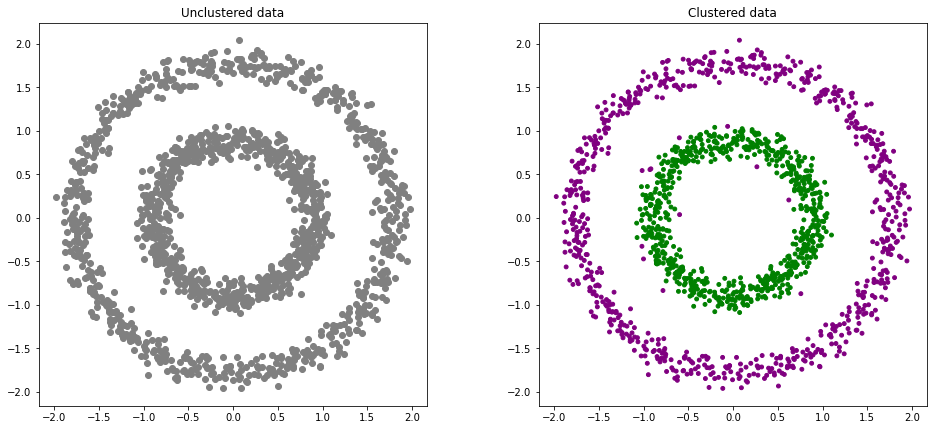

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
axs[0].scatter(data[:, 0], data[:, 1], color='grey')
axs[0].set_title('Unclustered data')

epsilon = .1
dbscan = DBSCAN(epsilon=epsilon, min_points=min_points)
dbscan.fit(data)

colors=['purple','red','blue','green']
axs[1].scatter(data[:, 0], data[:, 1], c=dbscan.clustering, cmap=ListedColormap(colors), s=15)    
axs[1].set_title('Clustered data')
plt.tight_layout(pad=8)

## Second Dataset

Text(0, 0.5, 'Epsilon')

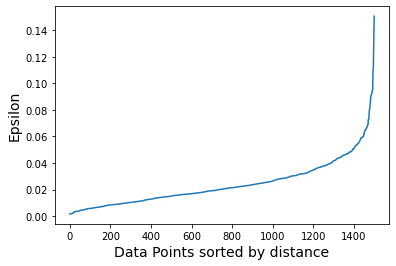

In [23]:
data2 = make_moons(n_samples=n_samples, noise=.05, random_state=42)
data2 = StandardScaler().fit_transform(data2[0])

# Decide on the value of epsilon
min_points = 4
nn = NearestNeighbors(n_neighbors=min_points)

nn.fit(data2)

distances, neighbors = nn.kneighbors(data2)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
X=list(range(0,len(distances)))
plt.plot(X, distances)

plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)

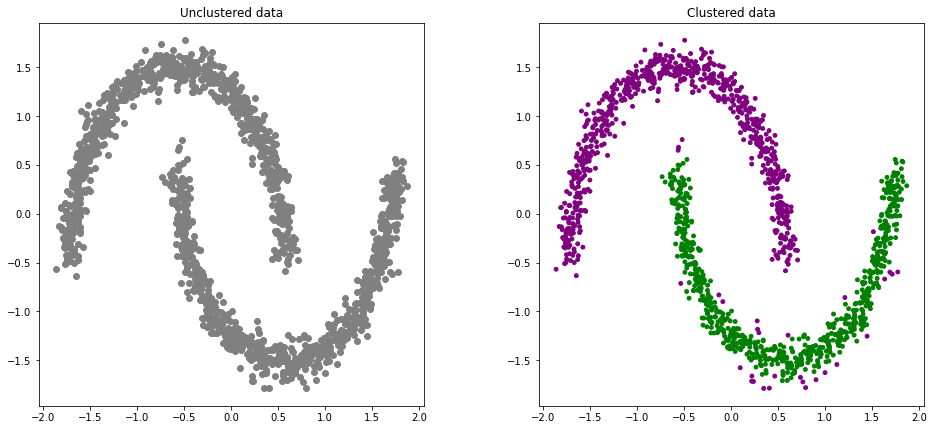

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
axs[0].scatter(data2[:, 0], data2[:, 1], color='grey')
axs[0].set_title('Unclustered data')

epsilon = .075
dbscan = DBSCAN(epsilon=epsilon, min_points=min_points)
dbscan.fit(data2)

colors=['purple','red','blue','green']
axs[1].scatter(data2[:, 0], data2[:, 1], c=dbscan.clustering, cmap=ListedColormap(colors), s=15)    
axs[1].set_title('Clustered data')
plt.tight_layout(pad=8)